In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

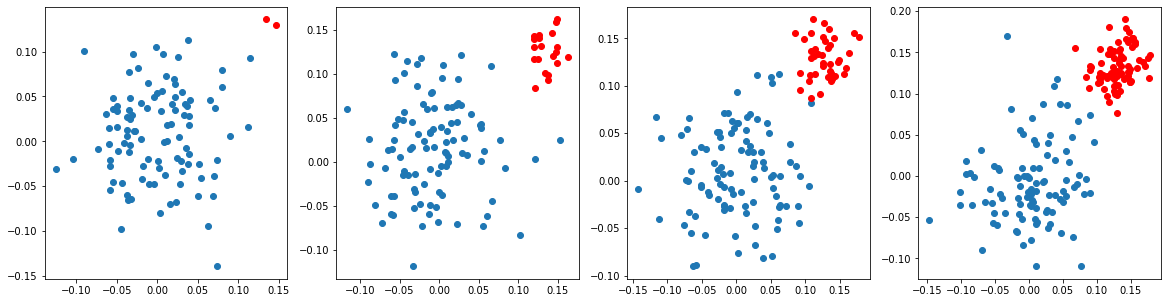

In [9]:
# here we are creating 2d imbalanced data points 
R = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(R):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

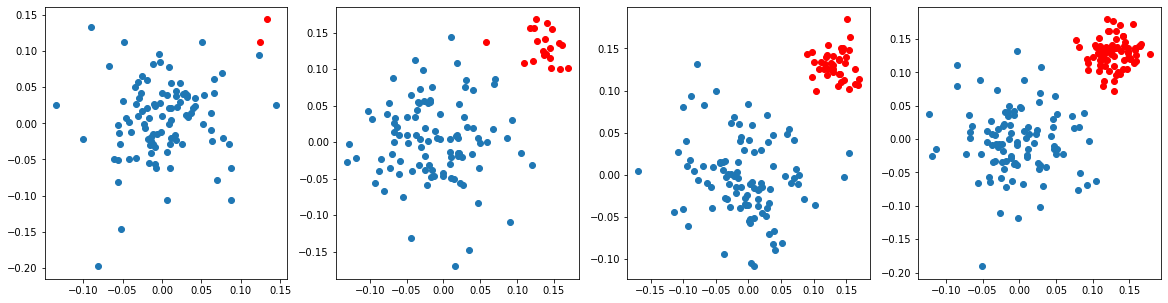

In [10]:
R = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
data_x= []
data_y=[]
for j,i in enumerate(R):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    data_x.append(X)
    data_y.append(y)
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()


<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

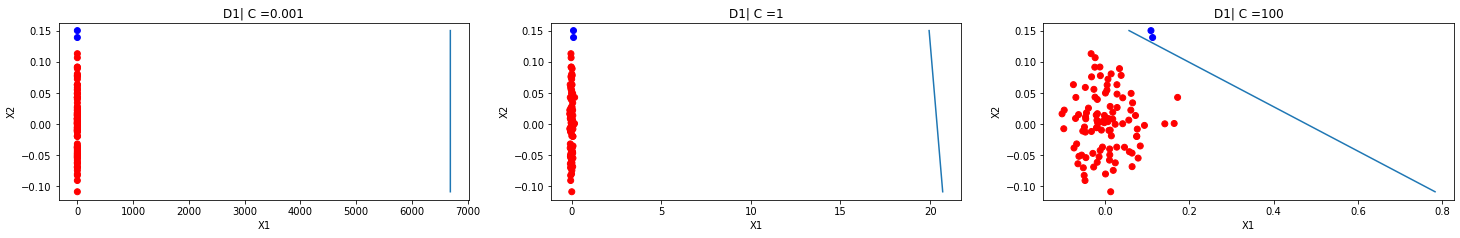

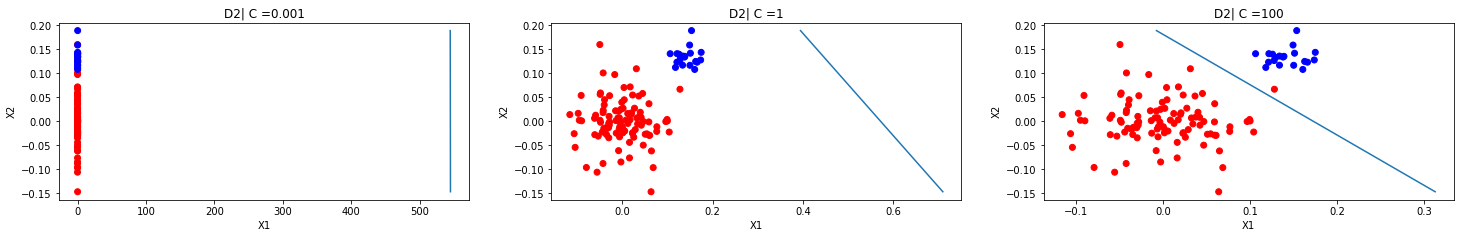

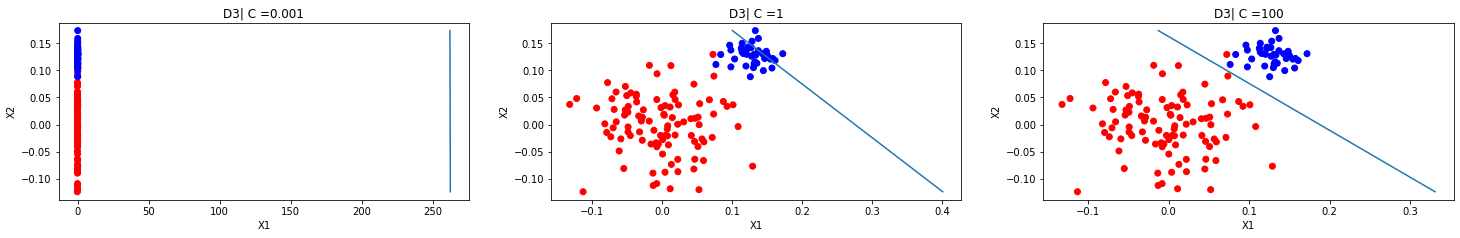

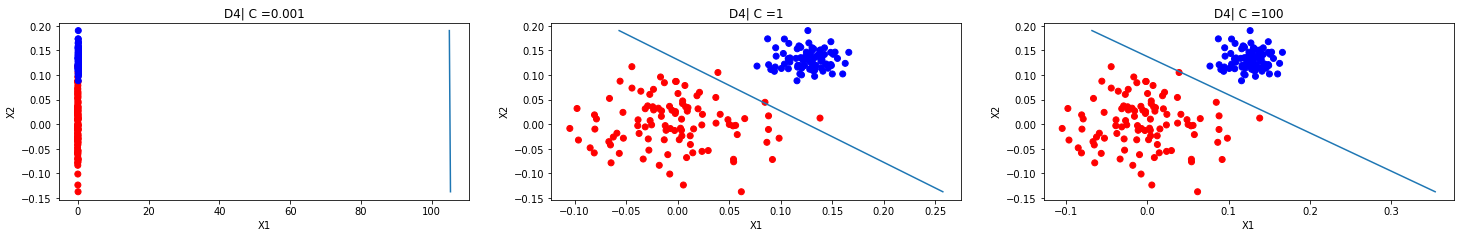

In [8]:
C= [0.001, 1, 100]
R=[0,1,2,3]
for id,i in enumerate(R):
  plt.figure(figsize=(25,15))
  for idx ,j in enumerate(C):
    plt.subplot(4,3,idx+1)
    clf = SVC(C=j,kernel = 'linear') 
    clf.fit(data_x[i],data_y[i])
    w=clf.coef_
    b=clf.intercept_
    plt.scatter(data_x[i][:, 0], data_x[i][:, 1], c=data_y[i], cmap='bwr') 
    plt.title('D'+str(id+1)+'| C ='+str(j))
    plt.xlabel('X1')
    plt.ylabel('X2')
    mi=min(data_x[i][:,1])
    mx=max(data_x[i][:,1])

    draw_line(w[0],b,mi,mx)

**Observations:**
1. The loss function in svm The regularisation strength is inversely related to the hyperparameter 'C.' The regularisation strength grows as the value of 'C' drops, and it tends to underfit as it considers all of its points to be in a single class. When the value of 'C' is exceedingly tiny, the model is underfitting because the hyperplane is too far away from the datapoints for the model to categorise the data. Because the value of 'C' is so tiny, there is no influence of unbalanced data on the model.
2. The regularisation strength lowers as the 'C' value increases, reducing model underfitting. When the value of 'C' equals 1, the model is underfitting since it is unable to categorise the classes because the data is severely unbalanced. However, when the dataset becomes slightly more balanced towards the bottom, we can observe that the model is able to categorise the points with some mistakes. The model works best with a well-balanced dataset, and outliers have little influence on the hyperplane.
3. Regularization strength is quite weak when the value of 'C' is very great, and this tends to oveffiting of the model. Even when the value of 'C' is big, the model is unable to identify when the dataset is extremely skewed. However, when the dataset balances out towards the bottom, we can see that the model is overfitting, making it vulnerable to outliers.

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [ ]:
#you can start writing code here.

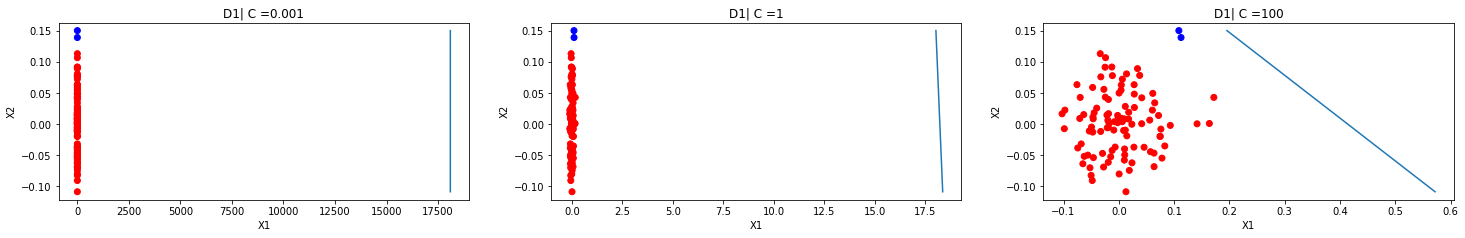

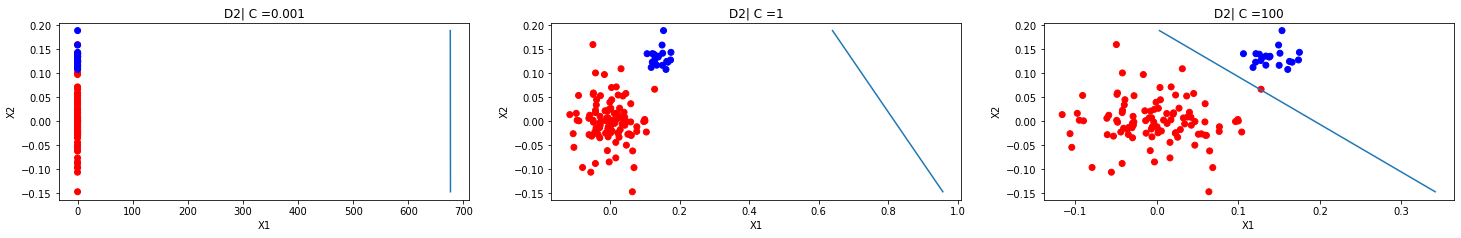

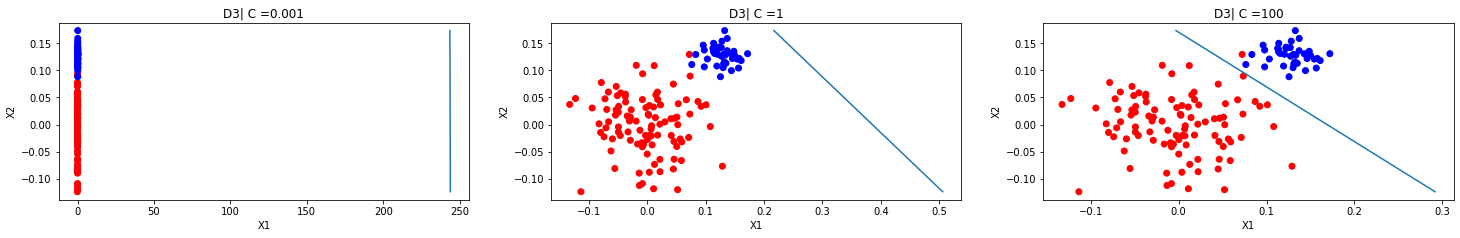

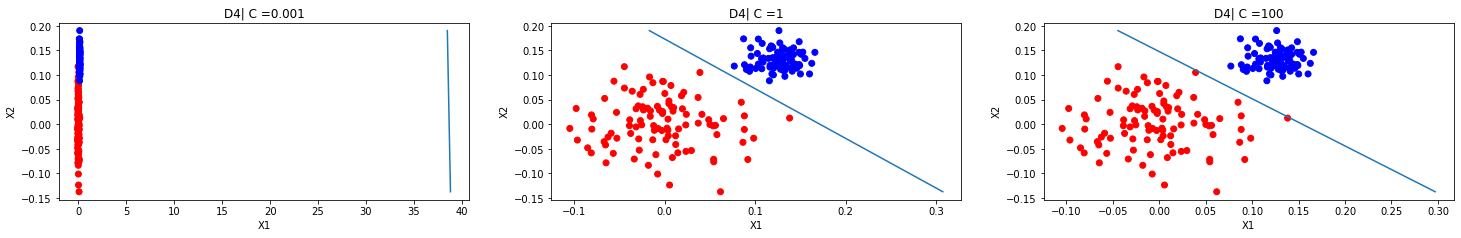

In [7]:
C= [0.001, 1, 100]
R=[0,1,2,3]
for id,i in enumerate(R):
  plt.figure(figsize=(25,15))
  for idx ,j in enumerate(C):
    plt.subplot(4,3,idx+1)
    clf = LogisticRegression(C=j,penalty = 'l2') 
    clf.fit(data_x[i],data_y[i])
    w=clf.coef_
    b=clf.intercept_
    plt.scatter(data_x[i][:, 0], data_x[i][:, 1], c=data_y[i], cmap='bwr') 
    plt.title('D'+str(id+1)+'| C ='+str(j))
    plt.xlabel('X1')
    plt.ylabel('X2')
    mi=min(data_x[i][:,1])
    mx=max(data_x[i][:,1])

    draw_line(w[0],b,mi,mx)

**Observations:**
1. The value of 'C' is inversly proportional to the Hyperparameter 'R'. As the value of 'C' drops, the 'R' value rises, and it becomes underfit since all of its points are assigned to a single class. The model is underfitting when the value of 'C' is very tiny because the model is unable to categorise the data and the hyperplane is distant from the datapoints. Because the value of 'C' is so tiny, there is no influence of unbalanced data on the hyperplane/model.
2. As the 'C' value increases, the 'R' value lowers, reducing model underfitting. When the value of 'C' equals 1, the model is underfitting since it is unable to categorise the classes because the data is severely unbalanced. However, we can see that once the dataset balances out towards the bottom, the model is able to categorise the points. Due to the existence of a sigmoid function in Logistic Regression, the model tends to operate effectively with a balanced dataset, and outliers have little influence on the hyperplane.
3.  When the value of 'C' is very big, the value of 'R' is very tiny, which causes the model to overfit. Even when the value of 'C' is big, the model is unable to identify when the dataset is extremely skewed. However, when the dataset becomes more balanced, we can observe that the model can categorise the points with some mistakes, and that the model eventually overfits.
Finally, we can state that given a balanced dataset and an ideal C value, SVM and Logistic Regression perform well. When the dataset is extremely skewed, it is not advised.